In [1]:
import matplotlib.pyplot as plt
import numpy as np

from flux import *
from xsec import *

import osc

from scipy.integrate import quad
from scipy.interpolate import interp1d

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
# Rate of neutrino interactions / dR / dE
# Units: (Number of Interactions) / m / GeV
def rate(flux, xsec, Enu, R, P, baseline):
    costh = np.cos(R/baseline)
    ret = flux(Emuon, P, Enu, costh, baseline)*xsec(Enu)*MASS*(4*np.pi*R*np.sqrt(RADIUS**2 - R**2)/VOLUME)
    if not isinstance(ret, float):
        ret[R > RADIUS] = 0
    elif R > RADIUS:
        return 0
    return ret

def numu_rate(Enu, R, P, B):
    return rate(numu_flux_baseline, xsec, Enu, R, P, B)

def nue_rate(Enu, R, P, B):
    return rate(nue_flux_baseline, xsec, Enu, R, P, B)

def numubar_rate(Enu, R, P, B):
    return rate(numu_flux_baseline, xsecbar, Enu, R, P, B)

def nuebar_rate(Enu, R, P, B):
    return rate(nue_flux_baseline, xsecbar, Enu, R, P, B)

In [4]:
# Possible Baselines

# ICECUBE

# Radius of earth
R_earth = 6371.0 # km

# Chicago latitude
lat = 41.88

# Baseline, approx sphere
alpha = ((90 - lat)/2)*np.pi/180
ICECUBE_BASELINE = np.sqrt(2*R_earth**2*(1 - np.cos((90+lat)*np.pi/180)))*1e3 # meters

# Others
PONE_BASELINE = 1758*1.60934*1e3
KM3NeT_BASELINE = 4427*1.60934*1e3

PONE_BASELINE/1e6, KM3NeT_BASELINE/1e6, ICECUBE_BASELINE/1e6

(2.82921972, 7.12454818, np.float64(11.634962593570254))

In [5]:
# 1Gt mass, baseline
MASS = 1e9

# density of water
DENSITY = 1 # t / m^3

VOLUME = MASS / DENSITY
RADIUS = np.power(VOLUME/((4./3.)*np.pi), 1./3.)
Emuon = 5e3

# Unpolarized
P = 0

In [6]:
DM41 = 1
TH41 = np.arcsin(np.sqrt(1e-2))/2
TH41

np.float64(0.0500837105807799)

In [7]:
baselines = np.logspace(0, np.log10(6.371*2), 20)*1e6
Enu = np.logspace(np.log10(Emuon/10), np.log10(Emuon), 50)[:-1]

numus = np.zeros((baselines.size, Enu.size))

for i, b in enumerate(baselines):
    nu_SM = np.abs(osc.oscillate(Enu, b, 1, -1, dL=100))**2
    nu = np.abs(osc.oscillate(Enu, b, 1, -1, dL=100, dm41=DM41, th24=TH41))**2
    
    for j in range(Enu.size):
        numus[i, j] = nu[1, j] / nu_SM[1, j]

Text(6124.54818, 4.8704773817499705, 'Chicago\n$\\to$KM3Net')

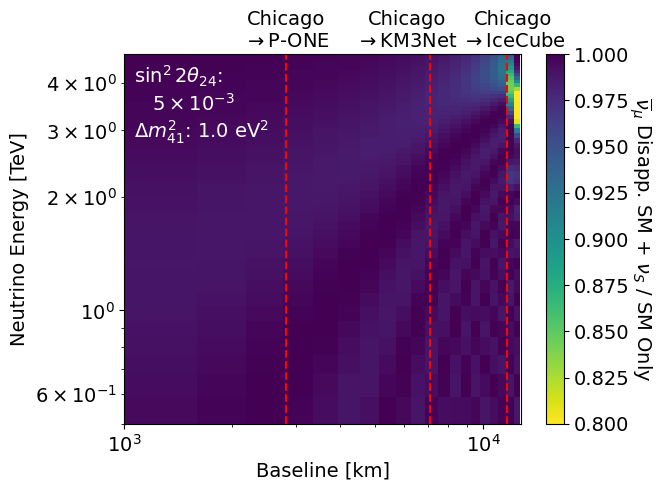

In [8]:
plt.imshow(numus.T, extent=[baselines[0]/1e3,baselines[-1]/1e3, Enu[0]/1e3, Enu[-1]/1e3], 
           aspect="auto", origin="lower", cmap="viridis_r", vmin=0.8, vmax=1)

cbar = plt.colorbar()
cbar.set_label('$\\overline{\\nu}_\\mu$ Disapp. SM + $\\nu_S$ / SM Only', rotation=270, labelpad=17)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Baseline [km]")
plt.ylabel("Neutrino Energy [TeV]")

plt.text(0.025, 0.975, "$\\sin^2 2\\theta_{24}$:\n   $5\\times10^{-3}$\n$\\Delta m^2_{41}$: %.1f eV$^2$" % DM41,
         transform=plt.gca().transAxes, verticalalignment="top", color="white")

dy=0.1

plt.axvline(ICECUBE_BASELINE/1e3, color="red", linestyle="--")
plt.axvline(PONE_BASELINE/1e3, color="red", linestyle="--")
plt.axvline(KM3NeT_BASELINE/1e3, color="red", linestyle="--")

plt.text(ICECUBE_BASELINE/1e3+0.5e3, plt.ylim()[1]+dy,'Chicago\n$\\to$IceCube', verticalalignment="bottom", horizontalalignment="center")
plt.text(PONE_BASELINE/1e3, plt.ylim()[1]+dy,'Chicago\n$\\to$P-ONE', verticalalignment="bottom", horizontalalignment="center")
plt.text(KM3NeT_BASELINE/1e3-1e3, plt.ylim()[1]+dy,'Chicago\n$\\to$KM3Net', verticalalignment="bottom", horizontalalignment="center")

In [9]:
# NuMu Disappearance

In [10]:
Enu = np.linspace(Emuon/100, Emuon, 100)

In [11]:
numubars = np.zeros(Enu.shape)
nues = np.zeros(Enu.shape)
for i, E in enumerate(Enu):
    numubars[i] = quad(lambda R: numubar_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
    nues[i] = quad(lambda R: nue_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]

/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr0000j6/T/ipykernel_68639/1192198077.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nues[i] = quad(lambda R: nue_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr0000j6/T/ipykernel_68639/1192198077.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  numubars[i] = quad(lambda R: numubar_rate(E, R, P, ICECUBE_BASELINE), 0, RADIUS)[0]
/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr0000j6/T/ipykernel_68639/1192198077.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be 

In [12]:
numubars_KM3 = np.zeros(Enu.shape)
nues_KM3 = np.zeros(Enu.shape)
for i, E in enumerate(Enu):
    numubars_KM3[i] = quad(lambda R: numubar_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
    nues_KM3[i] = quad(lambda R: nue_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]

/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr0000j6/T/ipykernel_68639/1102672668.py:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  nues_KM3[i] = quad(lambda R: nue_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr0000j6/T/ipykernel_68639/1102672668.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numubars_KM3[i] = quad(lambda R: numubar_rate(E, R, P, KM3NeT_BASELINE), 0, RADIUS)[0]
/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr000

In [13]:
numu_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 1, -1, dL=50, dm41=DM41, th24=TH41))**2
nue_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 0, 1, dL=50, dm41=DM41, th24=TH41))**2

numu_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 1, -1, dL=50, dm41=DM41, th24=TH41))**2
nue_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 0, 1, dL=50, dm41=DM41, th24=TH41))**2

In [14]:
# fraction of interactions
dE = Enu[1] - Enu[0]
print(np.sum(nues*dE), np.sum(nues*dE)/5e14)
print(np.sum(numubars*dE), np.sum(numubars*dE)/5e14)

708067291.2072853 1.4161345824145705e-06
431214170.58290493 8.624283411658099e-07


In [15]:
# fraction of interactions
dE = Enu[1] - Enu[0]
print(np.sum(nues_KM3*dE), np.sum(nues_KM3*dE)/5e14)

749159791.756295 1.49831958351259e-06


In [16]:
from matplotlib.legend_handler import HandlerBase

class TwoLineLegend(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        if len(orig_handle) == 1:
            return [plt.Line2D([], [], color="white")]
        
        p1 = orig_handle[0][0]
        p2 = orig_handle[1][0]
        c1 = p1.get_color()
        c2 = p2.get_color()
        s1 = p1.get_linestyle()
        s2 = p2.get_linestyle()
        
        l1 = plt.Line2D([x0,y0+width], [height,height], 
                                                linestyle=s1, color=c1)
        l2 = plt.Line2D([x0,y0+width], [0,0], linestyle=s2, color=c2)
        return [l1, l2]

Text(0.585, 1.055, 'SM + $\\nu_S$')

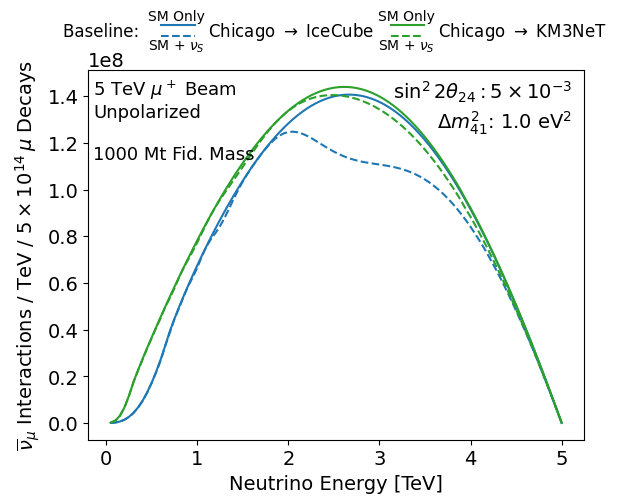

In [17]:
p1 = plt.plot(Enu / 1e3, numubars*1e3, color="tab:blue")
p2 = plt.plot(Enu / 1e3, (nues*nue_osc_ICECUBE[1] + numubars*numu_osc_ICECUBE[1])*1e3, 
              color="tab:blue", linestyle="--")

p3 = plt.plot(Enu / 1e3, numubars_KM3*1e3, color="tab:green")
p4 = plt.plot(Enu / 1e3, (nues_KM3*nue_osc_KM3NeT[1] + numubars_KM3*numu_osc_KM3NeT[1])*1e3, color="tab:green", linestyle="--")

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("$\\overline{\\nu}_\\mu$ Interactions / TeV / $5 \\times 10^{14}\\, \\mu$ Decays")
plt.text(0.975, 0.975, "$\\sin^2 2\\theta_{24}: 5\\times10^{-3}$\n$\\Delta m^2_{41}$: %.1f eV$^2$" % DM41,
         transform=plt.gca().transAxes, verticalalignment="top", horizontalalignment="right")

plt.text(0.01, 0.98, "%i TeV $\\mu^+$ Beam\nUnpolarized\n\n%i Mt Fid. Mass" % (Emuon/1e3, MASS/1e6), 
         transform=plt.gca().transAxes, verticalalignment="top", fontsize=13)

p0 = plt.plot([], [])
legend = plt.legend([(p0[0],), (p1, p2), (p3, p4)], ["Baseline: ", "Chicago $\\to$ IceCube", "Chicago $\\to$ KM3NeT"], 
           handler_map={tuple: TwoLineLegend()}, ncol=3, fontsize=12, columnspacing=1, frameon=False,
          loc='upper center', bbox_to_anchor=(0.45, 1.175))

plt.text(0.12, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.12, 1.055, "SM + $\\nu_S$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.585, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.585, 1.055, "SM + $\\nu_S$", transform=plt.gca().transAxes, fontsize=10)


In [18]:
numu_to_numu_ICECUBE = interp1d(Enu, numu_osc_ICECUBE[1])
nue_to_numu_ICECUBE = interp1d(Enu, nue_osc_ICECUBE[1])

numu_to_numu_KM3NeT = interp1d(Enu, numu_osc_KM3NeT[1])
nue_to_numu_KM3NeT = interp1d(Enu, nue_osc_KM3NeT[1])

In [19]:
Rs = np.linspace(0, RADIUS, 50)

numuICESM_per_Rs = np.zeros(Rs.shape)
numuICE_per_Rs = np.zeros(Rs.shape)

numuKM3SM_per_Rs = np.zeros(Rs.shape)
numuKM3_per_Rs = np.zeros(Rs.shape)

for i, R in enumerate(Rs):
    numuICESM_per_Rs[i] = quad(lambda E: numubar_rate(E, R, P, ICECUBE_BASELINE), Emuon/100, Emuon)[0]
    
    numuICE_per_Rs[i] = quad(lambda E: numubar_rate(E, R, P, ICECUBE_BASELINE)*numu_to_numu_ICECUBE(E), Emuon/100, Emuon)[0] +\
        quad(lambda E: nue_rate(E, R, -1, ICECUBE_BASELINE)*nue_to_numu_ICECUBE(E), Emuon/100, Emuon)[0]

    numuKM3SM_per_Rs[i] = quad(lambda E: numubar_rate(E, R, P, KM3NeT_BASELINE), Emuon/100, Emuon)[0]
    
    numuKM3_per_Rs[i] = quad(lambda E: numubar_rate(E, R, P, KM3NeT_BASELINE)*numu_to_numu_KM3NeT(E), Emuon/100, Emuon)[0] +\
        quad(lambda E: nue_rate(E, R, -1, KM3NeT_BASELINE)*nue_to_numu_KM3NeT(E), Emuon/100, Emuon)[0]

/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr0000j6/T/ipykernel_68639/1852643109.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numuICE_per_Rs[i] = quad(lambda E: numubar_rate(E, R, P, ICECUBE_BASELINE)*numu_to_numu_ICECUBE(E), Emuon/100, Emuon)[0] +\
/var/folders/8y/rb4m2d3j4z3fprk2tgbc0sbr0000j6/T/ipykernel_68639/1852643109.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty 

In [20]:
colors = ["#6fbbd6", "#b8598d", "#eb1521"]

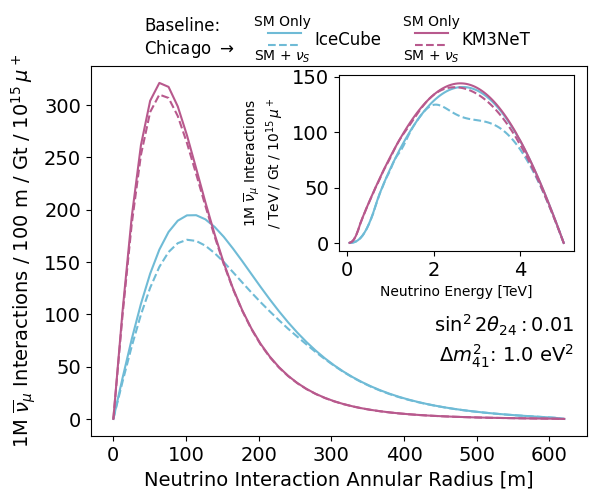

In [26]:
p1 = plt.plot(Rs, numuICESM_per_Rs*1e2/1e6, label="S.M. IceCube", color=colors[0])
p2 = plt.plot(Rs, numuICE_per_Rs*1e2/1e6, label="$\\nu_S$ IceCube", color=colors[0], linestyle="--")

p3 = plt.plot(Rs, numuKM3SM_per_Rs*1e2/1e6, label="S.M. KM3Net", color=colors[1])
p4 = plt.plot(Rs, numuKM3_per_Rs*1e2/1e6, label="$\\nu_S$ KM3Net", color=colors[1], linestyle="--")

# plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel("Neutrino Interaction Annular Radius [m]")
plt.ylabel("1M $\\overline{\\nu}_\\mu$ Interactions / 100 m / Gt / $10^{15}\\, \\mu^+$")
plt.text(0.975, 0.2, "$\\sin^2 2\\theta_{24}: 0.01$\n$\\Delta m^2_{41}$: %.1f eV$^2$" % DM41,
         transform=plt.gca().transAxes, horizontalalignment="right")

# plt.text(0.975, 0.975, "%i TeV $\\mu^+$ Beam\nUnpolarized\n\n%i Mt Fid. Mass" % (Emuon/1e3, MASS/1e6), 
         # transform=plt.gca().transAxes, verticalalignment="top", horizontalalignment="right", fontsize=13)

p0 = plt.plot([], [])
legend = plt.legend([(p0[0],), (p1, p2), (p3, p4)], ["Baseline:\nChicago $\\to$", "IceCube", "KM3NeT"], 
           handler_map={tuple: TwoLineLegend()}, ncol=3, fontsize=12, frameon=False,
          loc='upper center', bbox_to_anchor=(0.45, 1.175))

inset_ax = plt.gca().inset_axes([0.5, 0.5, 0.475, 0.475])
p1 = inset_ax.plot(Enu / 1e3, numubars*1e3/1e6, color=colors[0])
p2 = inset_ax.plot(Enu / 1e3, (nues*nue_osc_ICECUBE[1] + numubars*numu_osc_ICECUBE[1])*1e3/1e6, 
              color=colors[0], linestyle="--")

p3 = inset_ax.plot(Enu / 1e3, numubars_KM3*1e3/1e6, color=colors[1])
p4 = inset_ax.plot(Enu / 1e3, (nues_KM3*nue_osc_KM3NeT[1] + numubars_KM3*numu_osc_KM3NeT[1])*1e3/1e6, color=colors[1], linestyle="--")
inset_ax.set_xlabel("Neutrino Energy [TeV]", fontsize=10)
inset_ax.set_ylabel("1M $\\overline{\\nu}_\\mu$ Interactions\n/ TeV / Gt / $10^{15}\\, \\mu^+$", fontsize=10)

plt.text(0.33, 1.11, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.33, 1.015, "SM + $\\nu_S$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.63, 1.11, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.63, 1.015, "SM + $\\nu_S$", transform=plt.gca().transAxes, fontsize=10)

plt.savefig("sterilenu_distributions.pdf", bbox_inches="tight")
plt.savefig("sterilenu_distributions.png", bbox_inches="tight")

In [22]:
# NuE Disappearance

In [27]:
numu_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 1, -1, dL=50, dm41=DM41, th14=TH41))**2
nue_osc_ICECUBE = np.abs(osc.oscillate(Enu, ICECUBE_BASELINE, 0, 1, dL=50, dm41=DM41, th14=TH41))**2

numu_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 1, -1, dL=50, dm41=DM41, th14=TH41))**2
nue_osc_KM3NeT = np.abs(osc.oscillate(Enu, KM3NeT_BASELINE, 0, 1, dL=50, dm41=DM41, th14=TH41))**2

Text(0.585, 1.055, 'SM + $\\nu_S$')

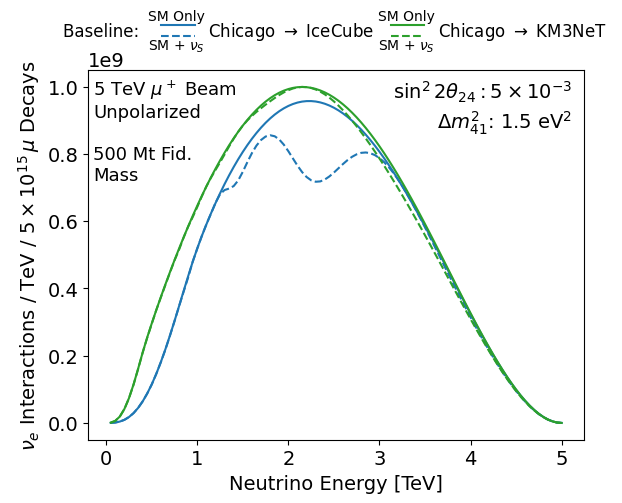

In [28]:
p1 = plt.plot(Enu / 1e3, nues*1e3, color="tab:blue")
p2 = plt.plot(Enu / 1e3, (nues*nue_osc_ICECUBE[0] + numubars*numu_osc_ICECUBE[0])*1e3, 
              color="tab:blue", linestyle="--")

p3 = plt.plot(Enu / 1e3, nues_KM3*1e3, color="tab:green")
p4 = plt.plot(Enu / 1e3, (nues_KM3*nue_osc_KM3NeT[0] + numubars_KM3*numu_osc_KM3NeT[0])*1e3, color="tab:green", linestyle="--")

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel("Neutrino Energy [TeV]")
plt.ylabel("$\\nu_e$ Interactions / TeV / $5 \\times 10^{15}\\, \\mu$ Decays")
plt.text(0.975, 0.975, "$\\sin^2 2\\theta_{24}: 5\\times10^{-3}$\n$\\Delta m^2_{41}$: %.1f eV$^2$" % DM41,
         transform=plt.gca().transAxes, verticalalignment="top", horizontalalignment="right")


plt.text(0.01, 0.98, "%i TeV $\\mu^+$ Beam\nUnpolarized\n\n%i Mt Fid.\nMass" % (Emuon/1e3, MASS/1e6), 
         transform=plt.gca().transAxes, verticalalignment="top", fontsize=13)

p0 = plt.plot([], [])
legend = plt.legend([(p0[0],), (p1, p2), (p3, p4)], ["Baseline: ", "Chicago $\\to$ IceCube", "Chicago $\\to$ KM3NeT"], 
           handler_map={tuple: TwoLineLegend()}, ncol=3, fontsize=12, columnspacing=1, frameon=False,
          loc='upper center', bbox_to_anchor=(0.45, 1.175))

plt.text(0.12, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.12, 1.055, "SM + $\\nu_S$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.585, 1.135, "SM Only", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.585, 1.055, "SM + $\\nu_S$", transform=plt.gca().transAxes, fontsize=10)


In [66]:
Emuon = 5e3
Enu = np.linspace(Emuon/50, Emuon, 50)
sinsq2th24 = np.logspace(-1, -4.5, 40)
th24s = np.arcsin(np.sqrt(sinsq2th24))/2

disapps = []
disapps_bar = []

for baseline in [ICECUBE_BASELINE, KM3NeT_BASELINE, PONE_BASELINE]:
    disapps.append([])
    disapps_bar.append([])
    
    for i, th24 in enumerate(th24s):
        numu_SM = np.abs(osc.oscillate(Enu, baseline, 1, 1, dL=100))[1].T**2
        numu = np.abs(osc.oscillate(Enu, baseline, 1, 1, dL=100, dm41=1.5, th24=th24))[1].T**2
        disapp = (numu / numu_SM) / (numu / numu_SM).mean()
        disapp_max = np.abs(1 - disapp).max()
        disapps[-1].append(disapp_max)
        
        numu_SM = np.abs(osc.oscillate(Enu, baseline, 1, -1, dL=100))[1].T**2
        numu = np.abs(osc.oscillate(Enu, baseline, 1, -1, dL=100, dm41=1.5, th24=th24))[1].T**2
        disapp = (numu / numu_SM) / (numu / numu_SM).mean()
        disapp_max = np.abs(1 - disapp).max()
        disapps_bar[-1].append(disapp_max)

In [67]:
colors = ["tab:blue", "tab:orange", "tab:red"]

Text(0.025, 1.11, 'Baseline:')

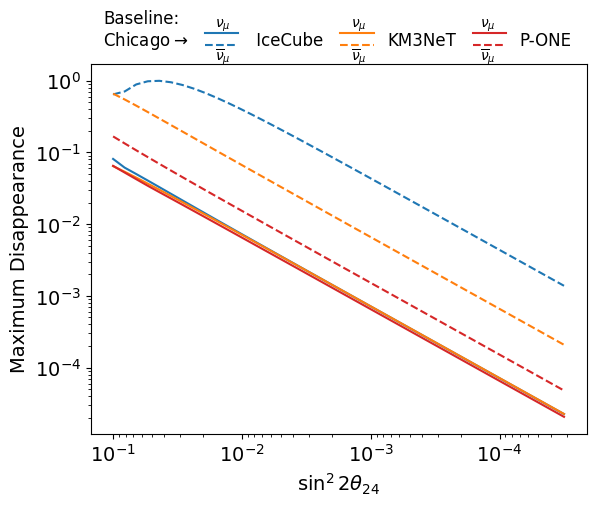

In [68]:
ps = []
pbars = []

for i, c in enumerate(colors):
    p = plt.plot(np.sin(th24s*2)**2, disapps[i], color=c)
    ps.append(p)
    
    p = plt.plot(np.sin(th24s*2)**2, disapps_bar[i], color=c, linestyle="--")
    pbars.append(p)

p0 = plt.plot([], [])
 
plt.xscale("log")
plt.yscale("log")
plt.gca().invert_xaxis()

legend = plt.legend([(p0[0],), (ps[0], pbars[0]), (ps[1], pbars[1]), (ps[2], pbars[2])], 
                    ["Chicago$\\to$", " IceCube", "KM3NeT", "P-ONE"], 
           handler_map={tuple: TwoLineLegend()}, ncol=4, fontsize=12, columnspacing=1, frameon=False,
          loc='upper center', bbox_to_anchor=(0.45, 1.135))

plt.text(0.25, 1.10, "$\\nu_\\mu$", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.25, 1.01, "$\\overline{\\nu}_\\mu$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.525, 1.10, "$\\nu_\\mu$", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.525, 1.01, "$\\overline{\\nu}_\\mu$", transform=plt.gca().transAxes, fontsize=10)

plt.text(0.785, 1.10, "$\\nu_\\mu$", transform=plt.gca().transAxes, fontsize=10)
plt.text(0.785, 1.01, "$\\overline{\\nu}_\\mu$", transform=plt.gca().transAxes, fontsize=10)
plt.ylabel("Maximum Disappearance") 
plt.xlabel("$\\sin^22\\theta_{24}$")
plt.text(0.025, 1.11, "Baseline:", transform=plt.gca().transAxes, fontsize=12)